In [1]:
import turboprop as tp
from nnTensor import Sequential, Dense, CrossEntropyLoss

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.1)
print(X.shape, y.shape)

(100, 2) (100,)


In [3]:
import matplotlib.pyplot as plt

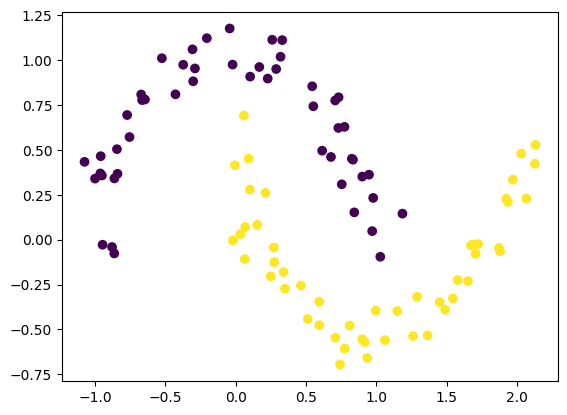

In [4]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y)

In [20]:
model = Sequential([
    Dense(2, 8),
    #Dense(16, 16),
    Dense(8, 2, relu=False)
    ])

In [21]:
def get_loss():
    loss = 0
    acc = 0

    z_pred = model(X.T)
    loss = CrossEntropyLoss()(z_pred, y.reshape(1, -1))
    acc = (z_pred.array.argmax(axis=0) == y).mean()

    return loss, acc


In [25]:
n_epoch = 200
alpha = 5e-1
for epoch in range(n_epoch):
    model.zero_grad()
    loss, acc = get_loss()
    if epoch % 5 == 0:
        print(f'{loss=}, {acc=}')
    loss.backward()
    for p in model.parameters():
        p.array -= alpha * p.grad





loss=Scalar([0.09430339]), grad=0, acc=0.98
loss=Scalar([0.09151521]), grad=0, acc=0.99
loss=Scalar([0.08919111]), grad=0, acc=0.98
loss=Scalar([0.08714279]), grad=0, acc=0.99
loss=Scalar([0.08534172]), grad=0, acc=0.98
loss=Scalar([0.08329567]), grad=0, acc=0.99
loss=Scalar([0.08171156]), grad=0, acc=0.98
loss=Scalar([0.07996079]), grad=0, acc=0.99
loss=Scalar([0.07826643]), grad=0, acc=0.99
loss=Scalar([0.07687997]), grad=0, acc=0.99
loss=Scalar([0.07571205]), grad=0, acc=0.99
loss=Scalar([0.07432956]), grad=0, acc=0.99
loss=Scalar([0.07287906]), grad=0, acc=0.99
loss=Scalar([0.07145303]), grad=0, acc=0.99
loss=Scalar([0.06936883]), grad=0, acc=0.99
loss=Scalar([0.06773346]), grad=0, acc=0.99
loss=Scalar([0.0659814]), grad=0, acc=0.99
loss=Scalar([0.0646281]), grad=0, acc=0.99
loss=Scalar([0.06288898]), grad=0, acc=0.99
loss=Scalar([0.06095299]), grad=0, acc=0.99
loss=Scalar([0.05954393]), grad=0, acc=0.99
loss=Scalar([0.05739362]), grad=0, acc=0.99
loss=Scalar([0.05562706]), grad=0,

In [26]:
import numpy as np
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]

Xmesh.shape
z_pred_map = model(Xmesh.T) 
z_ind_map = z_pred_map.array.argmax(axis=0)

#inputs = [list(map(Value, xrow)) for xrow in Xmesh]
#inputs = [xrow for xrow in Xmesh]

#scores = list(map(model, inputs))
#scores

(-1.6949701515831324, 2.0550298484168676)

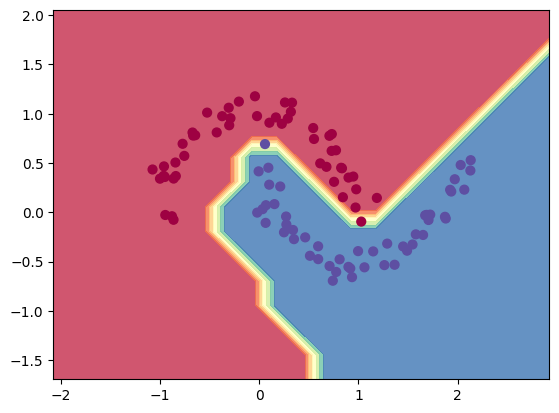

In [27]:
#Z = np.array([s[0].value > 0 for s in scores])
#Z = Z.reshape(xx.shape)
Z = z_ind_map.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
